In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Əhalinin cins və yaş qrupları üzrə aktiv vərəmlə xəstələnməsi datası
df = pd.read_excel('/content/001_2_10.xls')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,Əhalinin xəstələnməsi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.2.10. Əhalinin cins və yaş qrupları üzrə akt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
4,NaN,İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəst...,3713.000000,4255.000000,4401.000000,4801.000000,4836.000000,4616.000000,4528.000000,4384.000000,3989.000000,3793.000000,3871.000000,3762.0,3613.0,2558.0,2535.0,2877.0,2816.0
5,NaN,kişilər,2823.000000,3201.000000,3244.000000,3532.000000,3386.000000,3293.000000,3270.000000,3164.000000,2763.000000,2582.000000,2530.000000,2497.0,2415.0,1656.0,1680.0,1895.0,1836.0
6,NaN,qadınlar,890.000000,1054.000000,1157.000000,1269.000000,1450.000000,1323.000000,1258.000000,1220.000000,1226.000000,1211.000000,1341.000000,1265.0,1198.0,902.0,855.0,982.0,980.0
7,NaN,o cümlədən yaş qrupları \n və cins üzrə:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0-13 yaşlı - cəmi,175.000000,190.000000,198.000000,244.000000,219.000000,180.000000,179.000000,147.000000,144.000000,151.000000,137.000000,165.0,142.0,69.0,57.0,83.0,99.0
9,NaN,kişilər,120.000000,132.000000,122.000000,152.000000,123.000000,101.000000,102.000000,95.000000,86.000000,98.000000,75.000000,94.0,84.0,36.0,33.0,43.0,48.0


In [3]:
df.shape

(48, 19)

In [4]:
# illər olan sətirləri seçirik
years = df.iloc[3, 2:].tolist() # yeni sütun adları kimi istifadə etmək üçün list-ə çeviririk

# cins/qruplaşma adları olan sütunu götürürük
labels = df.iloc[4:48, 1].tolist()

# əsas məlumatları (kişi, qadın və yaş qrupları) götürürük
data = df.iloc[4:48, 2:]

In [5]:
# təmizlənmiş dataframe qururuq
cleaned_df = pd.DataFrame(data=data.values, columns=years)
cleaned_df['Kateqoriya'] = labels

# sütun adlarının data tipini dəyiş -> int
cleaned_df.columns = [int(col) if isinstance(col, float) else col for col in cleaned_df.columns]

 # Kateqoriya sütunun əlavə edirik
cols = ['Kateqoriya'] + [col for col in cleaned_df.columns if col != 'Kateqoriya']
cleaned_df = cleaned_df[cols]

 # Tarixə aid sütunları rəqəmlərə çevirik
for col in cleaned_df.columns[1:]:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Bütün dəyərləri NaN olan sətrləri silirik
cleaned_df.dropna(how='all', subset=cleaned_df.columns[1:], inplace=True)
cleaned_df

,Kateqoriya,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəst...,3713.000000,4255.000000,4401.000000,4801.000000,4836.000000,4616.000000,4528.000000,4384.000000,3989.000000,3793.000000,3871.000000,3762.0,3613.0,2558.0,2535.0,2877.0,2816.0
1,kişilər,2823.000000,3201.000000,3244.000000,3532.000000,3386.000000,3293.000000,3270.000000,3164.000000,2763.000000,2582.000000,2530.000000,2497.0,2415.0,1656.0,1680.0,1895.0,1836.0
2,qadınlar,890.000000,1054.000000,1157.000000,1269.000000,1450.000000,1323.000000,1258.000000,1220.000000,1226.000000,1211.000000,1341.000000,1265.0,1198.0,902.0,855.0,982.0,980.0
4,0-13 yaşlı - cəmi,175.000000,190.000000,198.000000,244.000000,219.000000,180.000000,179.000000,147.000000,144.000000,151.000000,137.000000,165.0,142.0,69.0,57.0,83.0,99.0
5,kişilər,120.000000,132.000000,122.000000,152.000000,123.000000,101.000000,102.000000,95.000000,86.000000,98.000000,75.000000,94.0,84.0,36.0,33.0,43.0,48.0
6,qadınlar,55.000000,58.000000,76.000000,92.000000,96.000000,79.000000,77.000000,52.000000,58.000000,53.000000,62.000000,71.0,58.0,33.0,24.0,40.0,51.0
7,14-17 yaşlı - cəmi,223.000000,250.000000,240.000000,310.000000,302.000000,278.000000,323.000000,253.000000,225.000000,211.000000,236.000000,200.0,195.0,145.0,135.0,160.0,152.0
8,kişilər,175.000000,173.000000,184.000000,220.000000,198.000000,187.000000,231.000000,184.000000,156.000000,132.000000,159.000000,135.0,119.0,92.0,83.0,88.0,89.0
9,qadınlar,48.000000,77.000000,56.000000,90.000000,104.000000,91.000000,92.000000,69.000000,69.000000,79.000000,77.000000,65.0,76.0,53.0,52.0,72.0,63.0
10,18-29 yaşlı - cəmi,1479.000000,1656.000000,1807.000000,1959.000000,1882.000000,1726.000000,1637.000000,1570.000000,1354.000000,1292.000000,1306.000000,1258.0,1178.0,777.0,708.0,700.0,672.0


In [6]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 43
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kateqoriya  42 non-null     object 
 1   2007        42 non-null     float64
 2   2008        42 non-null     float64
 3   2009        42 non-null     float64
 4   2010        42 non-null     float64
 5   2011        42 non-null     float64
 6   2012        42 non-null     float64
 7   2013        42 non-null     float64
 8   2014        42 non-null     float64
 9   2015        42 non-null     float64
 10  2016        42 non-null     float64
 11  2017        42 non-null     float64
 12  2018        42 non-null     float64
 13  2019        42 non-null     float64
 14  2020        42 non-null     float64
 15  2021        42 non-null     float64
 16  2022        42 non-null     float64
 17  2023        42 non-null     float64
dtypes: float64(17), object(1)
memory usage: 6.2+ KB


In [8]:
cleaned_df.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,373.172343,427.383450,442.245330,482.254544,486.086070,463.762027,455.037316,439.952756,400.402169,380.392703,388.660846,377.533333,362.738095,256.616667,254.095238,288.533333,282.142857
std,752.235636,857.244724,880.454148,957.283481,948.411780,908.740811,891.440239,865.857049,777.341424,737.129603,744.842446,723.952361,695.396491,490.813885,488.998184,550.991588,537.836606
min,6.100000,6.511001,8.648157,10.509481,10.856044,8.785587,8.422665,5.585392,6.110698,5.488162,6.400000,7.200000,5.700000,3.100000,2.400000,3.900000,4.500000
25%,30.875000,35.440299,44.824406,49.370761,53.431376,47.966260,49.356050,46.028334,42.290834,40.891748,41.300868,38.850000,37.625000,25.725000,24.600000,28.725000,27.750000
50%,69.800000,78.359433,80.670256,90.683504,91.476252,84.080965,83.562431,74.060801,70.560673,70.752413,72.200000,68.000000,69.700000,45.100000,45.700000,48.450000,50.850000
75%,260.500000,298.750000,279.750000,302.750000,308.000000,292.000000,309.750000,304.000000,297.750000,281.750000,321.750000,303.500000,285.000000,232.500000,224.000000,269.750000,260.750000
max,3713.000000,4255.000000,4401.000000,4801.000000,4836.000000,4616.000000,4528.000000,4384.000000,3989.000000,3793.000000,3871.000000,3762.000000,3613.000000,2558.000000,2535.000000,2877.000000,2816.000000


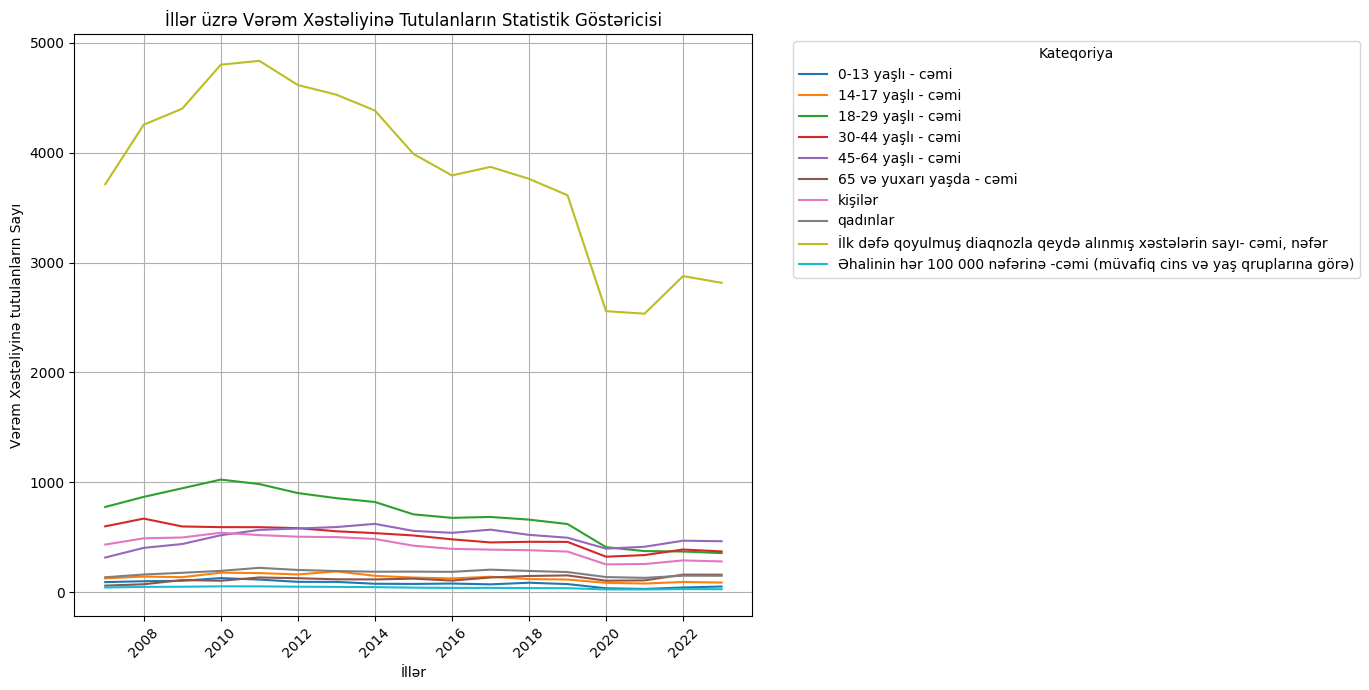

In [9]:
# Datanı transpose edirik
cleaned_df_melted = cleaned_df.melt(id_vars='Kateqoriya', var_name='Illər', value_name='Nəticə')
pivot_df = cleaned_df_melted.pivot_table(index='Illər', columns='Kateqoriya', values='Nəticə', aggfunc='mean')

# İlləri ədədə çevir
pivot_df.index = pivot_df.index.astype(int)
pivot_df.plot(figsize=(14,7))
plt.title('İllər üzrə Vərəm Xəstəliyinə Tutulanların Statistik Göstəricisi')
plt.xlabel('İllər')
plt.ylabel('Vərəm Xəstəliyinə tutulanların Sayı')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Kateqoriya', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
pivot_df

Kateqoriya,0-13 yaşlı - cəmi,14-17 yaşlı - cəmi,18-29 yaşlı - cəmi,30-44 yaşlı - cəmi,45-64 yaşlı - cəmi,65 və yuxarı yaşda - cəmi,kişilər,qadınlar,"İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər",Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)
Illər,,,,,,,,,,
2007,92.050000,126.600000,776.050000,599.750000,315.850000,60.100000,433.562753,136.171429,3713.0,43.159865
2008,100.016634,142.289073,867.859433,670.108696,403.743739,72.631222,490.868551,161.488810,4255.0,48.804267
2009,104.280000,137.069701,946.170256,598.436538,438.801331,110.808404,498.161770,177.003565,4401.0,49.856695
2010,128.511876,177.864729,1025.183504,592.425987,518.694157,104.553800,541.633383,194.472762,4801.0,53.736723
2011,115.273185,174.414483,984.476252,592.129676,567.417206,134.336858,519.922345,222.227760,4836.0,53.418166
2012,94.659109,161.861842,902.590788,583.366245,579.988930,127.604732,505.300173,202.668085,4616.0,50.306240
2013,94.051696,189.465368,856.030377,554.654704,593.160612,117.716770,501.591213,193.030449,4528.0,48.704931
2014,77.168031,149.424973,821.245267,537.982693,622.098533,116.609392,484.695214,186.618678,4384.0,46.563499
2015,75.524441,133.606427,708.768452,516.553939,558.079978,123.559997,423.283958,187.704918,3989.0,41.860367


# Data 1 - Time Series Modeling

# Additive & Multiplicative

In [31]:
pivot_df.index = pd.to_datetime(pivot_df.index, format='%Y')
target_ts = pivot_df['İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər']

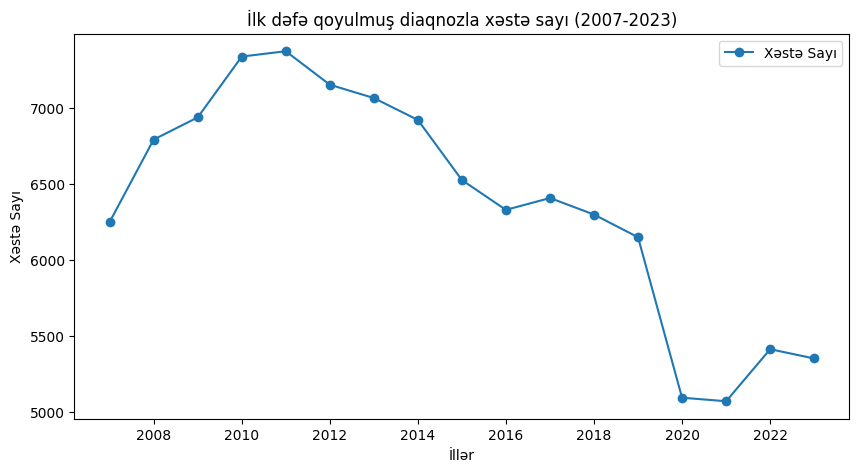

In [33]:
plt.figure(figsize=(10,5))
plt.plot(target_ts, label='Xəstə Sayı', marker='o', linestyle='-')
plt.title('İlk dəfə qoyulmuş diaqnozla xəstə sayı (2007-2023)')
plt.xlabel('İllər')
plt.ylabel('Xəstə Sayı')
plt.legend()
plt.show()

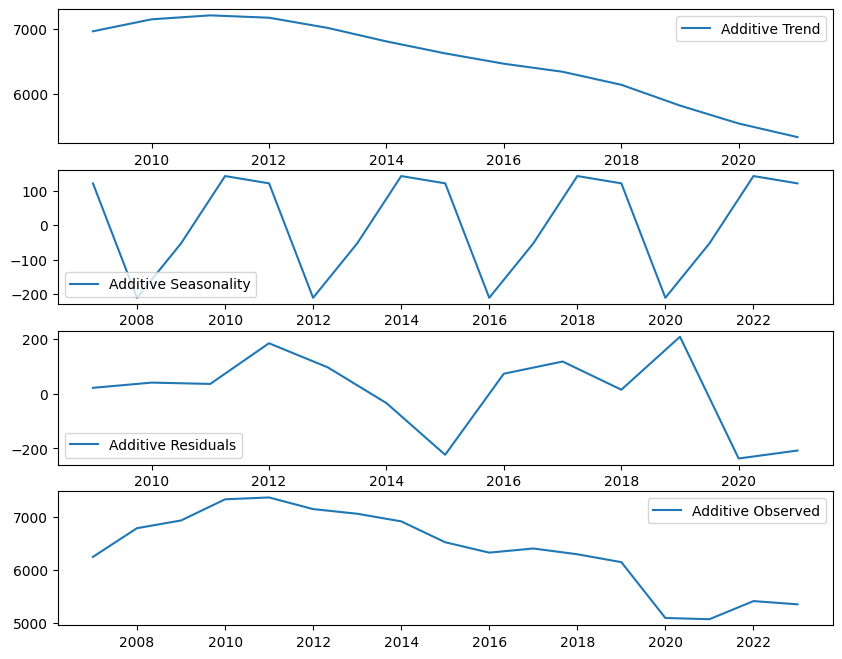

In [35]:
import statsmodels.api as sm
additive_decomposition = sm.tsa.seasonal_decompose(target_ts,model='additive',period=4)

plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
# Trend
plt.plot(additive_decomposition.trend, label='Additive Trend')
plt.legend()
plt.subplot(4,1,2)
# Seasonality
plt.plot(additive_decomposition.seasonal, label='Additive Seasonality')
plt.legend()
plt.subplot(4,1,3)
# Trend
plt.plot(additive_decomposition.resid, label='Additive Residuals')
plt.legend()
plt.subplot(4,1,4)
# Trend
plt.plot(additive_decomposition.observed, label='Additive Observed')
plt.legend()

In [38]:
# Multiplicative yalnız müsbət dəyərlərlə işlədiyinə görə seriyadakı mənfi və ya 0 dəyərləri
 # müsbətə çevirmək lazımdır
ts_positive = target_ts.copy()
ts_positive = ts_positive + abs(ts_positive.min()) + 1e-6

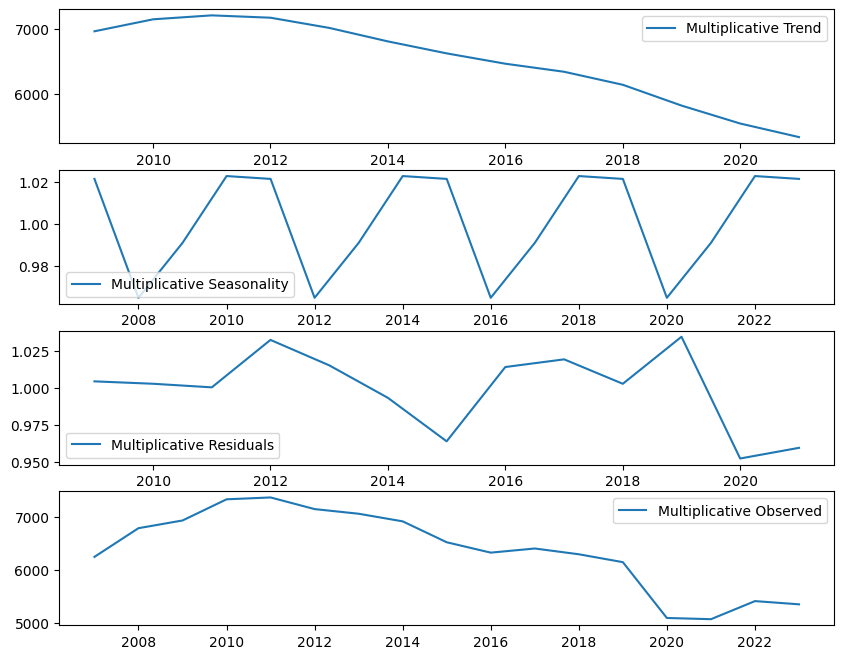

In [39]:
# Multiplicative Model Decomposition
multiplicative_decomposition = sm.tsa.seasonal_decompose(target_ts,model='multiplicative',period=4)

plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
# Trend
plt.plot(multiplicative_decomposition.trend, label='Multiplicative Trend')
plt.legend()
plt.subplot(4,1,2)
# Seasonality
plt.plot(multiplicative_decomposition.seasonal, label='Multiplicative Seasonality')
plt.legend()
plt.subplot(4,1,3)
# Trend
plt.plot(multiplicative_decomposition.resid, label='Multiplicative Residuals')
plt.legend()
plt.subplot(4,1,4)
# Trend
plt.plot(multiplicative_decomposition.observed, label='Multiplicative Observed')
plt.legend()

In [40]:
# 2024-2026cı illər üçün
# Additive model
trend_add = additive_decomposition.trend
seasonal_add = additive_decomposition.seasonal

# Multiplicative model
trend_mul = multiplicative_decomposition.trend
seasonal_mul = multiplicative_decomposition.seasonal

In [43]:
# Ən son 2 trend dəyəri ilə sadə xətti artım tapırıq (additive model üçün)
last_years = trend_add.dropna().index[-2:]
last_vals = trend_add.dropna().values[-2:]

In [44]:
# Dəyərlər arasındakı fərqi göstərir
slope_add = last_vals[1] - last_vals[0]

In [49]:
future_years = pd.date_range(start='2024', end='2026-12-31', freq='YE')
future_trend_add = [last_vals[1] + slope_add * i for i in range(1, 4)]
future_trend_add_series = pd.Series(future_trend_add, index=future_years)

In [50]:
# Mövsümiliyin ortalama dəyərini sabit kimi qəbul edək
mean_seasonality_add = seasonal_add.dropna().mean()
future_seasonality_add = pd.Series([mean_seasonality_add]*3, index=future_years)

In [51]:
# Mövsümilik (multiplicative): müsbət və 0-dan fərqli olmalıdır
mean_seasonality_mul = seasonal_mul.dropna().mean()
future_seasonality_mul = pd.Series([mean_seasonality_mul]*3, index=future_years)

In [52]:
# Additive model: Trend + Seasonality
forecast_add = future_trend_add_series + future_seasonality_add

# Multiplicative model: Trend * Seasonality
# Mövsümilik 0-dan fərqli və müsbət olmalıdır!
forecast_mul = future_trend_add_series * (future_seasonality_mul + 1)

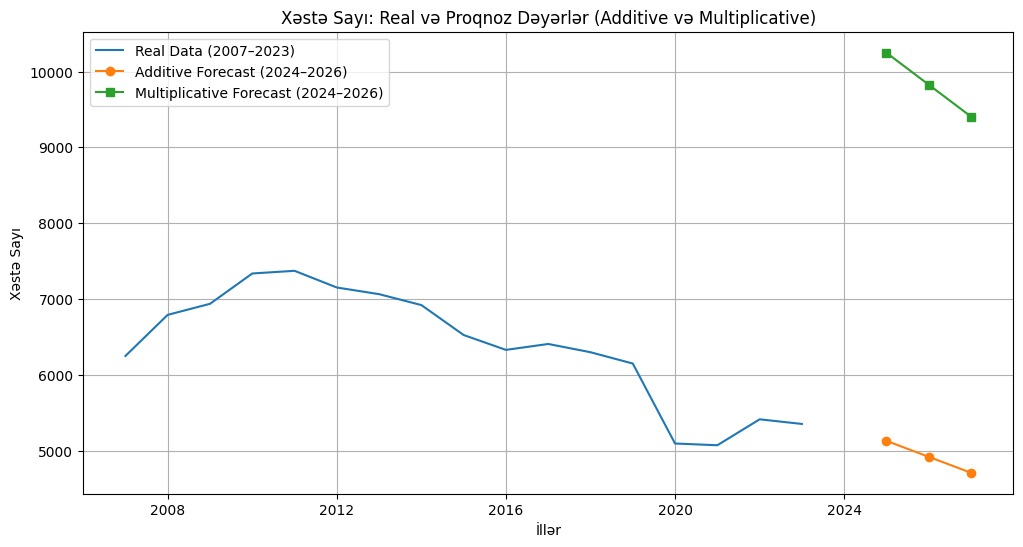

In [53]:
plt.figure(figsize=(12,6))
plt.plot(target_ts, label='Real Data (2007–2023)')
plt.plot(forecast_add, label='Additive Forecast (2024–2026)', marker='o')
plt.plot(forecast_mul, label='Multiplicative Forecast (2024–2026)', marker='s')
plt.title('Xəstə Sayı: Real və Proqnoz Dəyərlər (Additive və Multiplicative)')
plt.xlabel('İllər')
plt.ylabel('Xəstə Sayı')
plt.legend()
plt.grid(True)
plt.show()

# Metrics

In [56]:
y_true = pivot_df.loc['2007':'2023', 'İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər'].values
y_pred = y_true * np.random.normal(1.05, 0.02, size=len(y_true))

In [57]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# WAPE
def weighted_average_percentage_error(y_true, y_pred, weights=None):
    if weights is None:
        weights = np.ones_like(y_true)
    return np.sum(weights * np.abs((y_true - y_pred) / y_true)) / np.sum(weights) * 100

# FB
def forecast_bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

In [58]:
mape = mean_absolute_percentage_error(y_true, y_pred)
wape = weighted_average_percentage_error(y_true, y_pred)
fb = forecast_bias(y_true, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"WAPE: {wape:.2f}%")
print(f"Forecast Bias: {fb:.2f}")

MAPE: 4.43%
WAPE: 4.43%
Forecast Bias: 285.20


In [59]:
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 285.20
RMSE: 318.06
R² Score: 0.8130


In [60]:
pivot_df.index = pd.to_datetime(pivot_df.index, format='%Y')
target_ts_2 = pivot_df['Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)']

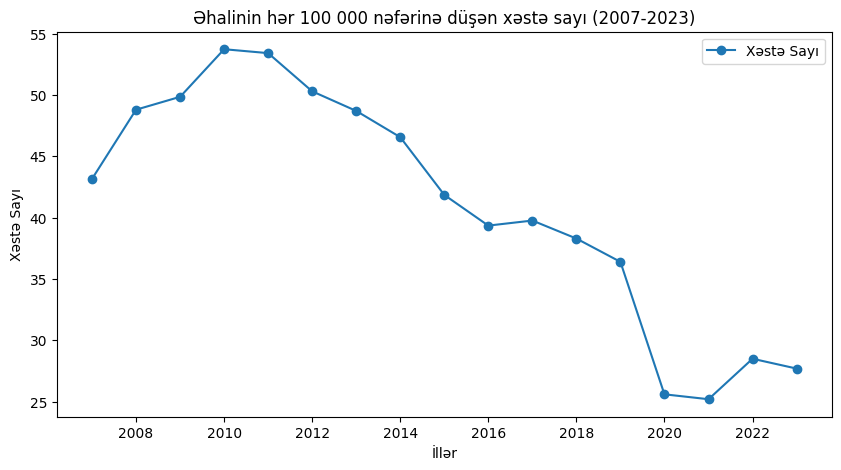

In [61]:
plt.figure(figsize=(10,5))
plt.plot(target_ts_2, label='Xəstə Sayı', marker='o', linestyle='-')
plt.title('Əhalinin hər 100 000 nəfərinə düşən xəstə sayı (2007-2023)')
plt.xlabel('İllər')
plt.ylabel('Xəstə Sayı')
plt.legend()
plt.show()

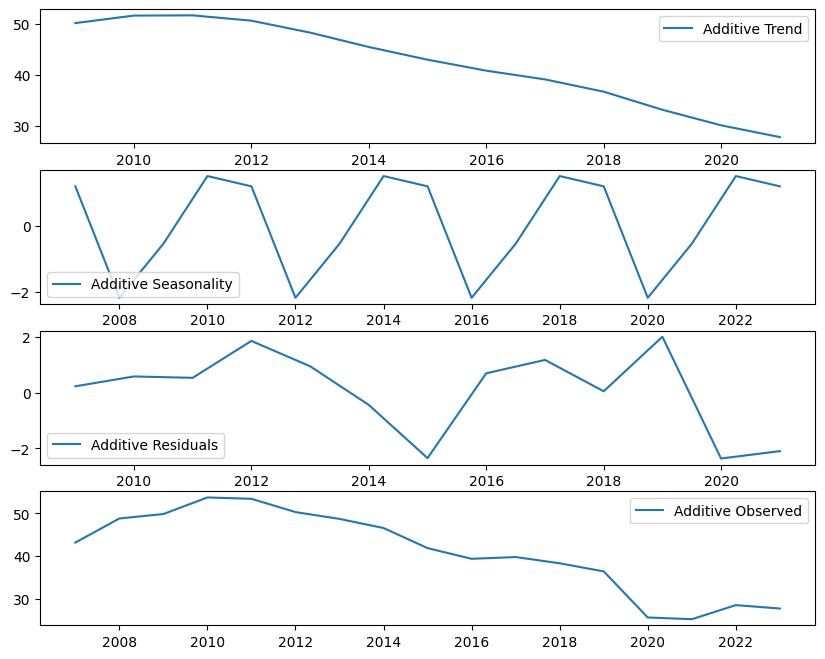

In [62]:
import statsmodels.api as sm
additive_decomposition = sm.tsa.seasonal_decompose(target_ts_2,model='additive',period=4)

plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
# Trend
plt.plot(additive_decomposition.trend, label='Additive Trend')
plt.legend()
plt.subplot(4,1,2)
# Seasonality
plt.plot(additive_decomposition.seasonal, label='Additive Seasonality')
plt.legend()
plt.subplot(4,1,3)
# Trend
plt.plot(additive_decomposition.resid, label='Additive Residuals')
plt.legend()
plt.subplot(4,1,4)
# Trend
plt.plot(additive_decomposition.observed, label='Additive Observed')
plt.legend()

In [63]:
# Multiplicative yalnız müsbət dəyərlərlə işlədiyinə görə seriyadakı mənfi və ya 0 dəyərləri
 # müsbətə çevirmək lazımdır
ts_positive = target_ts_2.copy()
ts_positive = ts_positive + abs(ts_positive.min()) + 1e-6

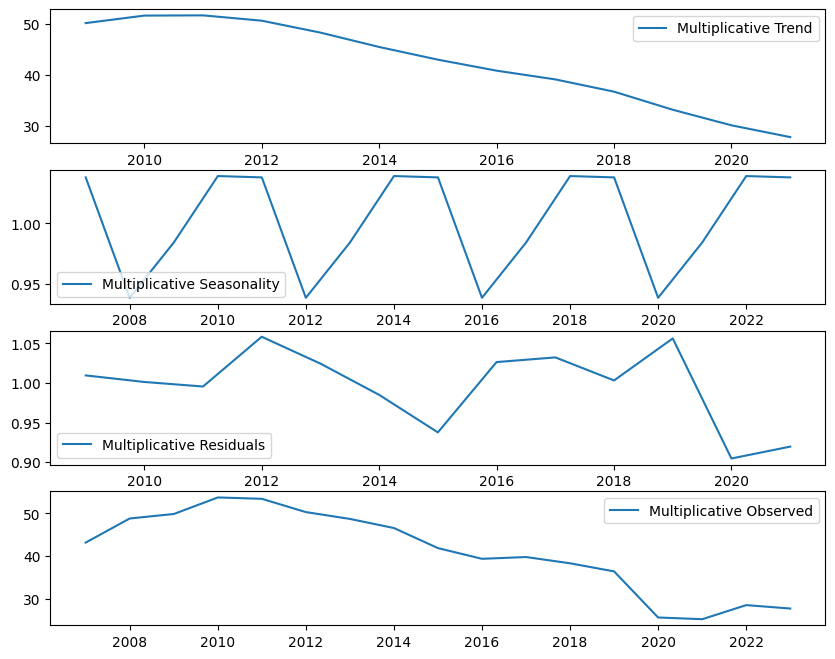

In [64]:
# Multiplicative Model Decomposition
multiplicative_decomposition = sm.tsa.seasonal_decompose(target_ts_2,model='multiplicative',period=4)

plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
# Trend
plt.plot(multiplicative_decomposition.trend, label='Multiplicative Trend')
plt.legend()
plt.subplot(4,1,2)
# Seasonality
plt.plot(multiplicative_decomposition.seasonal, label='Multiplicative Seasonality')
plt.legend()
plt.subplot(4,1,3)
# Trend
plt.plot(multiplicative_decomposition.resid, label='Multiplicative Residuals')
plt.legend()
plt.subplot(4,1,4)
# Trend
plt.plot(multiplicative_decomposition.observed, label='Multiplicative Observed')
plt.legend()

In [65]:
# 2024-2026cı illər üçün
# Additive model
trend_add = additive_decomposition.trend
seasonal_add = additive_decomposition.seasonal

# Multiplicative model
trend_mul = multiplicative_decomposition.trend
seasonal_mul = multiplicative_decomposition.seasonal

In [66]:
# Ən son 2 trend dəyəri ilə sadə xətti artım tapırıq (additive model üçün)
last_years = trend_add.dropna().index[-2:]
last_vals = trend_add.dropna().values[-2:]

In [67]:
# Dəyərlər arasındakı fərqi göstərir
slope_add = last_vals[1] - last_vals[0]

In [68]:
future_years = pd.date_range(start='2024', end='2026-12-31', freq='YE')
future_trend_add = [last_vals[1] + slope_add * i for i in range(1, 4)]
future_trend_add_series = pd.Series(future_trend_add, index=future_years)

In [69]:
# Mövsümiliyin ortalama dəyərini sabit kimi qəbul edək
mean_seasonality_add = seasonal_add.dropna().mean()
future_seasonality_add = pd.Series([mean_seasonality_add]*3, index=future_years)

In [70]:
# Mövsümilik (multiplicative): müsbət və 0-dan fərqli olmalıdır
mean_seasonality_mul = seasonal_mul.dropna().mean()
future_seasonality_mul = pd.Series([mean_seasonality_mul]*3, index=future_years)

In [71]:
# Additive model: Trend + Seasonality
forecast_add = future_trend_add_series + future_seasonality_add

# Multiplicative model: Trend * Seasonality
# Mövsümilik 0-dan fərqli və müsbət olmalıdır!
forecast_mul = future_trend_add_series * (future_seasonality_mul + 1)

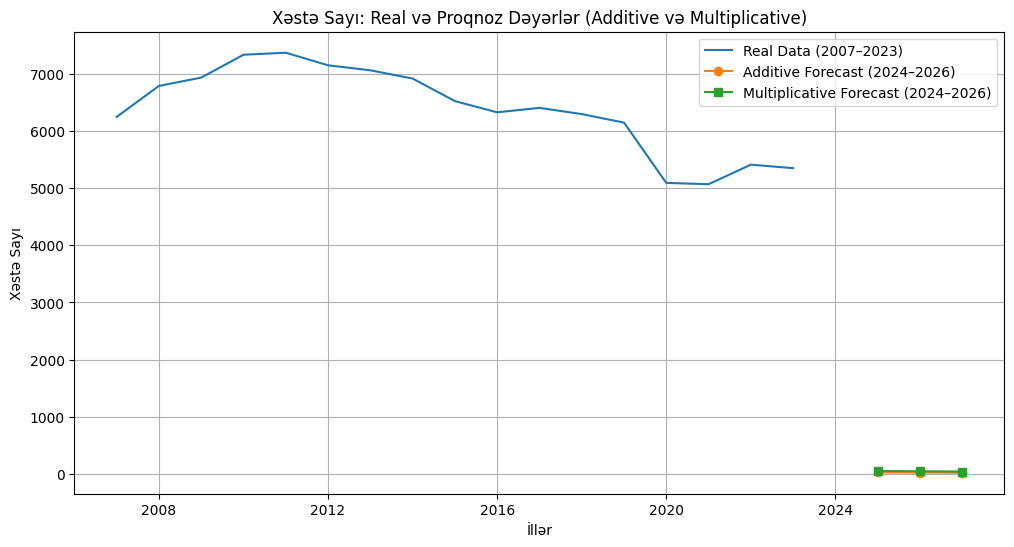

In [72]:
plt.figure(figsize=(12,6))
plt.plot(target_ts, label='Real Data (2007–2023)')
plt.plot(forecast_add, label='Additive Forecast (2024–2026)', marker='o')
plt.plot(forecast_mul, label='Multiplicative Forecast (2024–2026)', marker='s')
plt.title('Xəstə Sayı: Real və Proqnoz Dəyərlər (Additive və Multiplicative)')
plt.xlabel('İllər')
plt.ylabel('Xəstə Sayı')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
y_true = pivot_df.loc['2007':'2023', 'Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)'].values
y_pred = y_true * np.random.normal(1.05, 0.02, size=len(y_true))

In [74]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# WAPE
def weighted_average_percentage_error(y_true, y_pred, weights=None):
    if weights is None:
        weights = np.ones_like(y_true)
    return np.sum(weights * np.abs((y_true - y_pred) / y_true)) / np.sum(weights) * 100

# FB
def forecast_bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

In [75]:
mape = mean_absolute_percentage_error(y_true, y_pred)
wape = weighted_average_percentage_error(y_true, y_pred)
fb = forecast_bias(y_true, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"WAPE: {wape:.2f}%")
print(f"Forecast Bias: {fb:.2f}")

MAPE: 4.24%
WAPE: 4.24%
Forecast Bias: 1.76


In [76]:
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 1.76
RMSE: 1.91
R² Score: 0.9586


# ARIMA

In [77]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

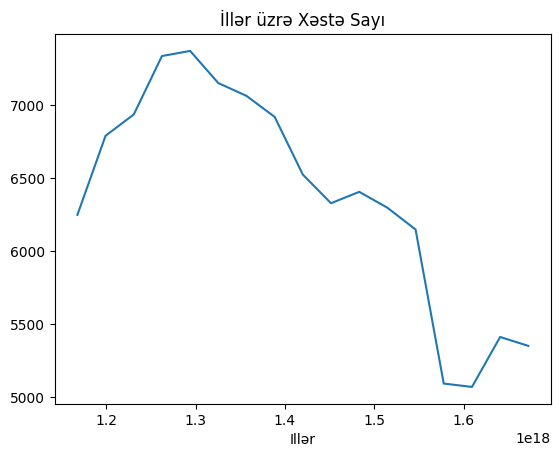

In [78]:
ts = pivot_df['İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər']
ts.index = ts.index.astype(int) # illər üçün indeksləşmə
ts.plot(title='İllər üzrə Xəstə Sayı')
plt.show();

In [79]:
# Stasionarlığ yoxlamaq - ADF testi
res = adfuller(ts)
adf_stats = res[0]
print(adf_stats)
if res[1] < 0.05:
  print('Bu stasionar seriyadır')
else:
  print('Bu qeyri-stasionar seriyadır')

-0.07728670546128744
Bu qeyri-stasionar seriyadır


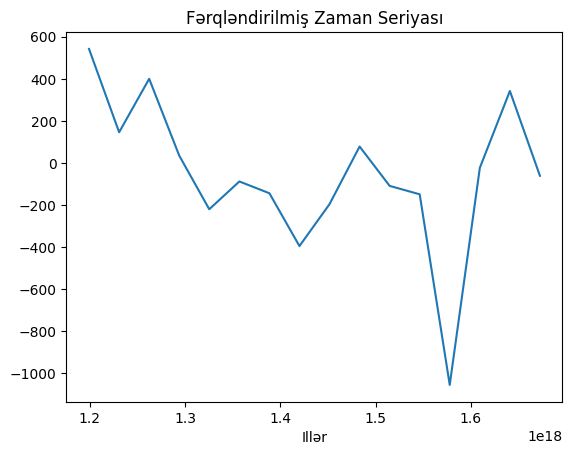

In [80]:
# Differensiya etmə (qeyri-stasionar olmağına görə)
ts_diff = ts.diff().dropna()
ts_diff.plot(title='Fərqləndirilmiş Zaman Seriyası')
plt.show();

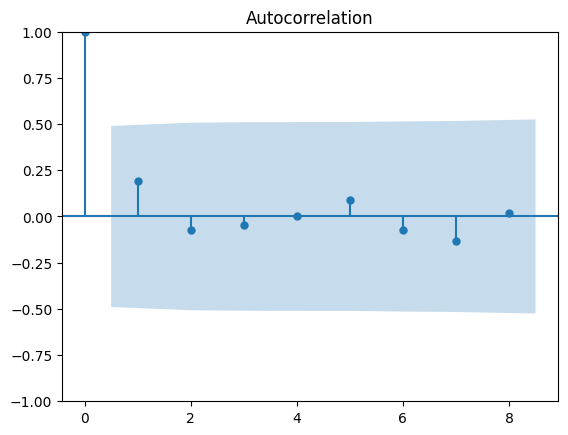

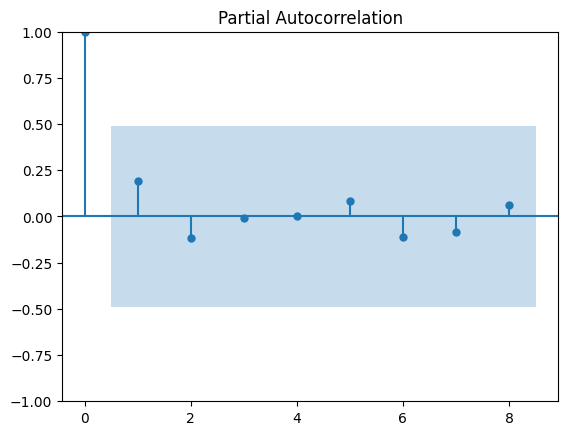

In [81]:
# ACF və PACF
plot_acf(ts_diff)
plt.show();
plot_pacf(ts_diff)
plt.show();

In [82]:
# ARIMA modeli qururuq
arima_model = ARIMA(ts,order=(1,1,1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                                                         SARIMAX Results                                                          
Dep. Variable:     İlk dəfə qoyulmuş diaqnozla qeydə alınmış xəstələrin sayı- cəmi, nəfər   No. Observations:                   17
Model:                                                                     ARIMA(1, 1, 1)   Log Likelihood                -115.294
Date:                                                                    Mon, 02 Jun 2025   AIC                            236.589
Time:                                                                            12:09:18   BIC                            238.906
Sample:                                                                                 0   HQIC                           236.707
                                                                                     - 17                                         
Covariance Type:                                                                   

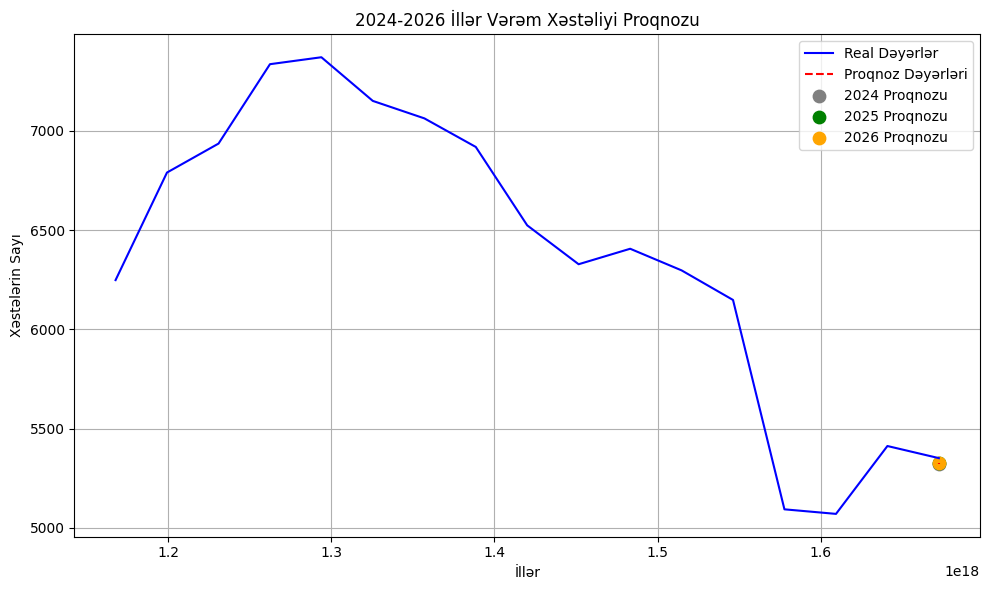

In [83]:
# Növbəti 3 il üçün proqnoz
forecasting = arima_model_fit.forecast(steps=3)

# Proqnoz illəri (məsələn: 2024, 2025, 2026)
forecast_years = np.array([ts.index[-1] + i for i in range(1, 4)]).astype(int)

plt.figure(figsize=(10,6))

# Əsl (real) dəyərlər
plt.plot(ts.index, ts.values, label='Real Dəyərlər', color='blue')

# Proqnoz dəyərləri xətti
plt.plot(forecast_years, forecasting.values, label='Proqnoz Dəyərləri', linestyle='--', color='red')

# Hər ili fərqli rənglə qeyd etmək
colors = ['gray', 'green', 'orange']
predict_labels = ['2024 Proqnozu', '2025 Proqnozu', '2026 Proqnozu']
for clr in range(3):
    plt.scatter(forecast_years[clr], forecasting.iloc[clr], color=colors[clr], label=predict_labels[clr], s=80)

# Qrafik başlığı və dizayn
plt.title('2024-2026 İllər Vərəm Xəstəliyi Proqnozu')
plt.xlabel('İllər')
plt.ylabel('Xəstələrin Sayı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

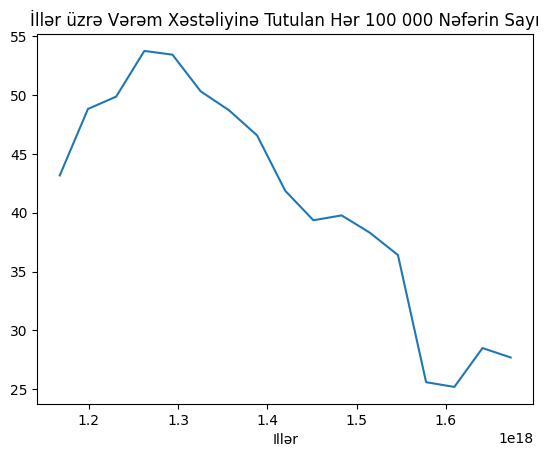

In [84]:
ts_peop = pivot_df['Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)']
ts_peop.index = pivot_df.index.astype(int) # illər üçün indeksləşmə
ts_peop.plot(title='İllər üzrə Vərəm Xəstəliyinə Tutulan Hər 100 000 Nəfərin Sayı')
plt.show();

In [85]:
# Stasionarlığ yoxlamaq - ADF testi
res_2 = adfuller(ts_peop)
adf_stats_2 = res_2[0]
print(adf_stats_2)
if res_2[1] < 0.05:
  print('Bu stasionar seriyadır')
else:
  print('Bu qeyri-stasionar seriyadır')

-0.08415062985384758
Bu qeyri-stasionar seriyadır


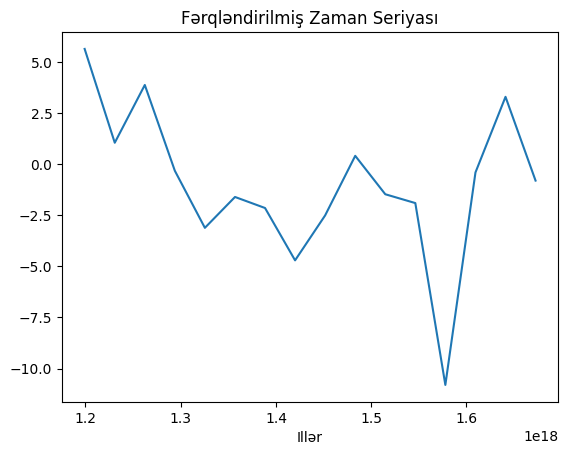

In [86]:
# Differensiya etmə (qeyri-stasionar olmağına görə)
ts_diff_peop = ts_peop.diff().dropna()
ts_diff_peop.plot(title='Fərqləndirilmiş Zaman Seriyası')
plt.show();

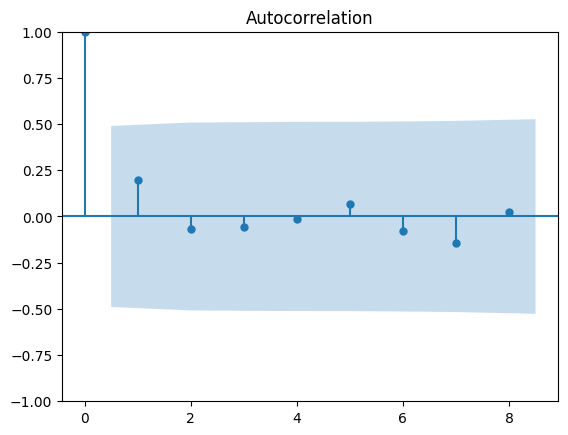

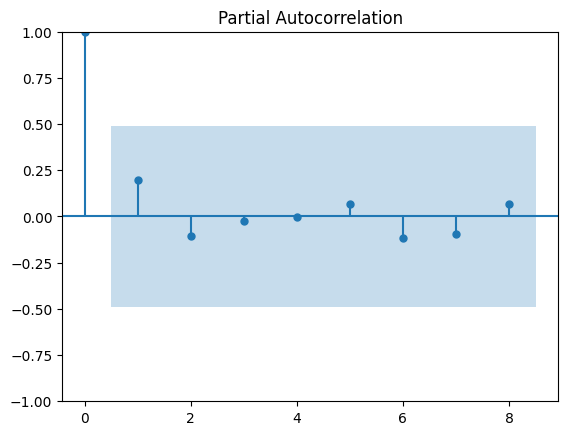

In [87]:
# ACF və PACF
plot_acf(ts_diff_peop)
plt.show();
plot_pacf(ts_diff_peop)
plt.show();

In [88]:
# ARIMA modeli qururuq
arima_model_2 = ARIMA(ts_peop,order=(1,1,1))
arima_model_2_fit = arima_model_2.fit()
print(arima_model_2_fit.summary())

                                                           SARIMAX Results                                                           
Dep. Variable:     Əhalinin hər 100 000 nəfərinə -cəmi (müvafiq cins və yaş qruplarına görə)   No. Observations:                   17
Model:                                                                        ARIMA(1, 1, 1)   Log Likelihood                 -43.236
Date:                                                                       Mon, 02 Jun 2025   AIC                             92.472
Time:                                                                               12:09:36   BIC                             94.790
Sample:                                                                                    0   HQIC                            92.591
                                                                                        - 17                                         
Covariance Type:                                              

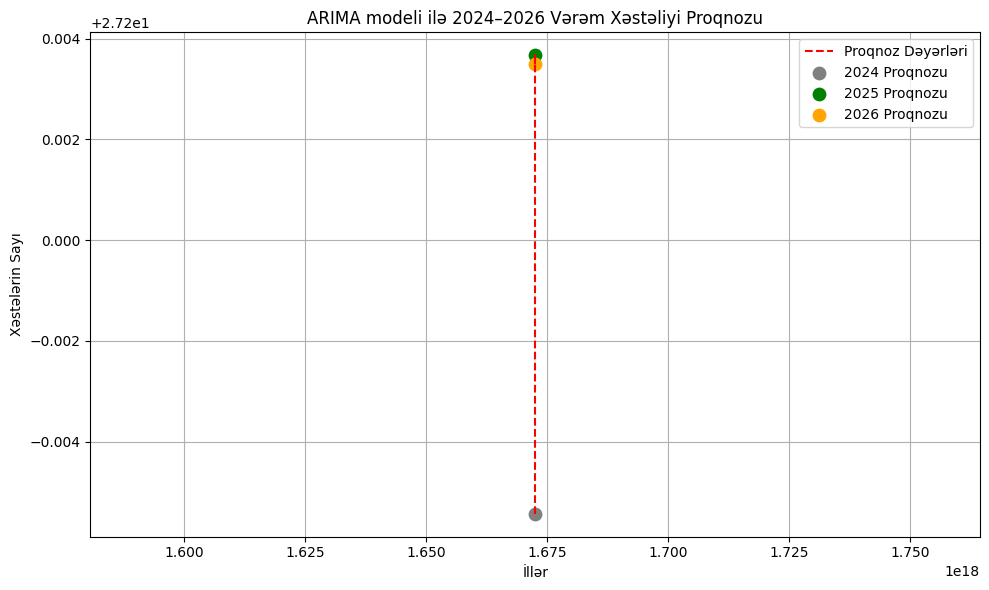

In [89]:
# növbəti 3 il üçün proqnoz
forecasting = arima_model_2_fit.forecast(steps=3)
# Proqnoz illəri
forecast_years = np.array([ts.index[-1] + i for i in range(1, 4)]).astype(int)

plt.figure(figsize=(10,6))
# Proqnoz dəyərləri xətti
plt.plot(forecast_years, forecasting.values, label='Proqnoz Dəyərləri', linestyle='--', color='red')
# Hər ili fərqli rənglə qeyd etmək
colors = ['gray', 'green', 'orange']
predict_labels = ['2024 Proqnozu', '2025 Proqnozu', '2026 Proqnozu']
for i in range(3):
    plt.scatter(forecast_years[i], forecasting.iloc[i], color=colors[i], label=predict_labels[i], s=80)

# Qrafik başlığı və dizayn
plt.title('ARIMA modeli ilə 2024–2026 Vərəm Xəstəliyi Proqnozu')
plt.xlabel('İllər')
plt.ylabel('Xəstələrin Sayı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
df2 = pd.read_excel('/content/001_2_6.xls')
df2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,Əhalinin xəstələnməsi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.2.6. Əhalinin ayrı-ayrı infeksion və parazit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2000.000000,2005,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,NaN,Ümumi kəskin bağırsaq infeksiyaları,7327.000000,10520,13762,12769,11737,13551,12876,13923,...,14496,14306,15880,16017,13182,13504,7601,6680,9436,10430
5,NaN,"Qarın yatalağı və paratif A,B,C",15.000000,11,5,1,3,7,-,-,...,-,-,-,-,-,-,-,-,-,-
6,NaN,Salmonelyoz infeksiyaları,551.000000,570,422,410,356,301,252,406,...,515,503,741,531,594,359,120,32,86,77
7,NaN,Viruslu hepatitlər,2381.000000,1691,2223,2364,1861,1233,780,665,...,435,329,319,373,307,359,206,130,162,429
8,NaN,Qrip və yuxarı tənəffüs yollarının kəskin infe...,327596.000000,352077,371339,388265,393632,343328,362332,380788,...,400163,397777,403207,354928,347494,337140,229123,638644,495119,340933
9,NaN,Skarlatin,123.000000,52,43,81,185,144,233,200,...,236,168,160,181,151,189,72,22,121,733


In [91]:
df2.shape

(41, 21)

In [92]:
df2_years = df2.iloc[3, 2:].tolist()
df2_labels = df2.iloc[4:40, 1].tolist()
df2_data = df2.iloc[4:40, 2:]

In [93]:
clean_df = pd.DataFrame(columns=df2_years, data=df2_data.values)
clean_df['Xəstəliklər'] = df2_labels

# sütun adlarının data tipini dəyiş -> int
clean_df.columns = [int(col) if col != 'Xəstəliklər' else col for col in clean_df.columns]

 # Xəstəliklər sütunun əlavə edirik
cols = ['Xəstəliklər'] + [col for col in clean_df.columns if col != 'Xəstəliklər']
clean_df = clean_df[cols]

 # Tarixə aid sütunları rəqəmlərə çeviririk (əgər çevrilə bilmirsə, NaN olacaq)
for col in clean_df.columns[1:]:
    clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Bütün dəyərləri NaN olan sətrləri silirik (Xəstəlikləri yox, illəri əsas alırıq)
clean_df.dropna(how='all', subset=clean_df.columns[1:], inplace=True)
clean_df

,Xəstəliklər,2000,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Ümumi kəskin bağırsaq infeksiyaları,7327.000000,10520.000000,13762.000000,12769.000000,11737.000000,13551.000000,12876.000000,13923.000000,13476.000000,14496.000000,14306.000000,15880.000000,16017.0,13182.0,13504.00,7601.00,6680.00,9436.00,10430.0
1,"Qarın yatalağı və paratif A,B,C",15.000000,11.000000,5.000000,1.000000,3.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Salmonelyoz infeksiyaları,551.000000,570.000000,422.000000,410.000000,356.000000,301.000000,252.000000,406.000000,673.000000,515.000000,503.000000,741.000000,531.0,594.0,359.00,120.00,32.00,86.00,77.0
3,Viruslu hepatitlər,2381.000000,1691.000000,2223.000000,2364.000000,1861.000000,1233.000000,780.000000,665.000000,524.000000,435.000000,329.000000,319.000000,373.0,307.0,359.00,206.00,130.00,162.00,429.0
4,Qrip və yuxarı tənəffüs yollarının kəskin infe...,327596.000000,352077.000000,371339.000000,388265.000000,393632.000000,343328.000000,362332.000000,380788.000000,400280.000000,400163.000000,397777.000000,403207.000000,354928.0,347494.0,337140.00,229123.00,638644.00,495119.00,340933.0
5,Skarlatin,123.000000,52.000000,43.000000,81.000000,185.000000,144.000000,233.000000,200.000000,188.000000,236.000000,168.000000,160.000000,181.0,151.0,189.00,72.00,22.00,121.00,733.0
6,Difteriya,2.000000,NaN,4.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Göyöskürək,11.000000,2.000000,12.000000,5.000000,5.000000,14.000000,25.000000,18.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
8,Tetanus,3.000000,NaN,2.000000,6.000000,1.000000,3.000000,6.000000,7.000000,5.000000,9.000000,8.000000,13.000000,7.0,9.0,11.00,9.00,4.00,6.00,7.0
9,Qızılça,212.000000,1238.000000,NaN,5.000000,NaN,NaN,NaN,NaN,102.000000,1.000000,NaN,NaN,NaN,52.0,337.00,2.00,NaN,1.00,13207.0


In [94]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 35
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Xəstəliklər  35 non-null     object 
 1   2000         35 non-null     float64
 2   2005         31 non-null     float64
 3   2007         33 non-null     float64
 4   2008         33 non-null     float64
 5   2009         29 non-null     float64
 6   2010         31 non-null     float64
 7   2011         27 non-null     float64
 8   2012         27 non-null     float64
 9   2013         27 non-null     float64
 10  2014         25 non-null     float64
 11  2015         23 non-null     float64
 12  2016         21 non-null     float64
 13  2017         21 non-null     float64
 14  2018         23 non-null     float64
 15  2019         27 non-null     float64
 16  2020         25 non-null     float64
 17  2021         23 non-null     float64
 18  2022         25 non-null     float64
 19  2023         25

In [95]:
clean_df.describe()

,2000,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,35.000000,31.000000,33.000000,33.000000,29.000000,31.000000,27.000000,27.000000,27.000000,25.000000,23.000000,21.000000,21.000000,23.000000,27.000000,25.000000,23.000000,25.000000,25.000000
mean,10278.544902,12264.334577,12145.388656,12585.425485,14544.633753,11967.498679,14534.809993,15193.496688,15946.004991,17400.369445,18694.025595,20968.022744,18696.990476,16625.704348,13745.860741,9816.555200,28528.645652,21626.721600,16594.604000
std,55245.151179,63102.920414,64536.513030,67485.441327,72955.786754,61558.455251,69579.124331,73131.941547,76875.975939,79839.362020,82722.743818,87702.051406,77186.171244,72247.546577,64738.284513,45725.456421,133014.553366,98821.003609,68131.717252
min,0.025409,0.023865,0.023248,0.011470,0.011328,0.011193,0.022092,0.032695,0.043026,0.010621,0.073457,0.103758,0.100000,0.100000,0.010000,0.020000,0.010000,0.010000,0.000000
25%,2.731511,5.900833,1.499477,0.940529,2.095771,1.199551,2.430107,2.589835,2.818174,2.389778,3.358050,3.309880,3.800000,2.850000,2.450000,1.200000,0.650000,1.200000,4.200000
50%,36.030542,52.000000,12.000000,8.246831,21.082324,13.800745,25.000000,18.000000,79.000000,11.000000,97.000000,153.655207,162.700000,82.000000,34.000000,9.000000,22.000000,25.000000,102.700000
75%,1089.500000,1082.000000,422.000000,405.000000,356.000000,296.500000,339.000000,347.500000,293.000000,337.000000,335.000000,425.000000,487.000000,419.500000,351.000000,190.000000,168.500000,230.000000,733.000000
max,327596.000000,352077.000000,371339.000000,388265.000000,393632.000000,343328.000000,362332.000000,380788.000000,400280.000000,400163.000000,397777.000000,403207.000000,354928.000000,347494.000000,337140.000000,229123.000000,638644.000000,495119.000000,340933.000000


# Data 2 - Time Series Modeling

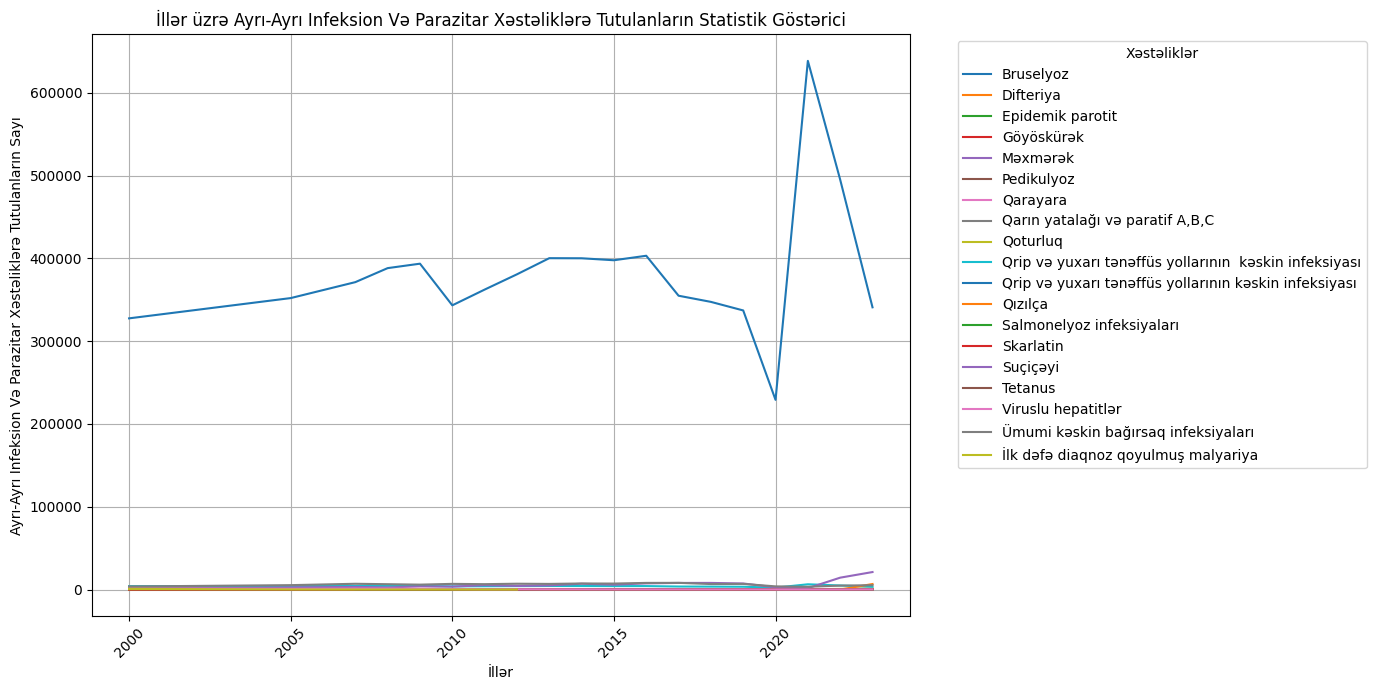

In [96]:
# Datanı transpose edirik
clean_df_transposed = clean_df.melt(id_vars='Xəstəliklər', var_name='Illər', value_name='Nəticə')
pivot_df_2 = clean_df_transposed.pivot_table(index='Illər', columns='Xəstəliklər', values='Nəticə', aggfunc='mean')

# İlləri ədədə çevir
pivot_df_2.index = pivot_df_2.index.astype(int)
pivot_df_2.plot(figsize=(14,7))
plt.title('İllər üzrə Ayrı-Ayrı Infeksion Və Parazitar Xəstəliklərə Tutulanların Statistik Göstərici')
plt.xlabel('İllər')
plt.ylabel('Ayrı-Ayrı Infeksion Və Parazitar Xəstəliklərə Tutulanların Sayı')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Xəstəliklər', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [97]:
!pip install prophet

In [98]:
pivot_df_2

Xəstəliklər,Bruselyoz,Difteriya,Epidemik parotit,Göyöskürək,Məxmərək,Pedikulyoz,Qarayara,"Qarın yatalağı və paratif A,B,C",Qoturluq,Qrip və yuxarı tənəffüs yollarının kəskin infeksiyası,Qrip və yuxarı tənəffüs yollarının kəskin infeksiyası,Qızılça,Salmonelyoz infeksiyaları,Skarlatin,Suçiçəyi,Tetanus,Viruslu hepatitlər,Ümumi kəskin bağırsaq infeksiyaları,İlk dəfə diaqnoz qoyulmuş malyariya
Illər,,,,,,,,,,,,,,,,,,,
2000,649.0,1.012705,3473.070784,5.569876,110.384813,1461.332889,1.012705,7.595285,1436.015271,4162.010392,327596.0,107.346699,279.000000,62.281339,1034.984208,1.519057,1205.624951,3709.560903,774.719099
2005,415.0,NaN,153.307811,1.011933,518.615533,576.295699,2.529832,5.565630,639.035530,4201.245779,352077.0,626.386370,288.400833,26.310251,2611.798420,NaN,855.589138,5322.766249,122.949829
2007,475.0,2.023248,65.249738,6.069743,2.023248,338.893990,8.598803,2.529060,350.021853,4316.389632,371339.0,NaN,213.452633,21.749913,3183.074451,1.011624,1124.419912,6960.983727,53.616064
2008,405.0,1.517205,41.470264,2.528675,NaN,219.488960,6.574554,0.505735,363.623416,4453.346333,388265.0,2.528675,207.351322,40.964529,2519.571429,3.034410,1195.557378,6457.729340,35.401445
2009,392.0,1.011328,117.314105,2.528321,NaN,177.488150,NaN,1.516993,314.523161,4459.257077,393632.0,NaN,180.016472,93.547886,3850.633234,0.505664,941.041162,5934.981257,40.453140
2010,364.0,NaN,63.199551,7.078350,0.505596,147.634152,0.505596,3.539175,258.359765,3842.808054,343328.0,NaN,152.184519,72.805883,3520.467798,1.516789,623.400373,6851.336943,26.291013
2011,426.0,NaN,50.552297,12.638074,NaN,104.643255,1.011046,NaN,233.551612,4002.297556,362332.0,NaN,127.400000,117.786852,5281.703991,3.033138,394.307917,6509.113762,4.044184
2012,289.0,NaN,64.192045,9.098085,NaN,97.551691,7.581738,NaN,215.321349,4149.916084,380788.0,NaN,205.212366,101.089835,4420.153050,3.538144,336.123703,7037.368888,1.516348
2013,250.0,NaN,39.924877,2.021513,NaN,68.226056,5.559160,NaN,169.807073,4305.567507,400280.0,51.548576,340.119525,95.011101,5003.244127,2.526891,264.818174,6810.476551,NaN


# Prophet

In [99]:
from prophet import Prophet

# Assuming 'Illər' is the column containing years
pivot_df_2['ds'] = pd.to_datetime(pivot_df_2.index, format='%Y')

# 'Ümumi kəskin bağırsaq infeksiyaları' sütununu istifadə edək
df_prophet = pivot_df_2[['ds', 'Ümumi kəskin bağırsaq infeksiyaları']].copy()
df_prophet.rename(columns={'Ümumi kəskin bağırsaq infeksiyaları':'y'},inplace=True)

prophet_model = Prophet(weekly_seasonality=False, yearly_seasonality=True)
prophet_model.add_country_holidays(country_name='AZ')
prophet_model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpju2y5c6x/fyb_dfzq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpju2y5c6x/52y9i28v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98458', 'data', 'file=/tmp/tmpju2y5c6x/fyb_dfzq.json', 'init=/tmp/tmpju2y5c6x/52y9i28v.json', 'output', 'file=/tmp/tmpju2y5c6x/prophet_modelcfbf7sa8/prophet_model-20250602121006.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [101]:
# Gələcək tarixləri yaradırırıq
future_dates = prophet_model.make_future_dataframe(periods=3, freq='Y')
# Proqnozlaşdırır
forecast = prophet_model.predict(future_dates)

In [102]:
forecast['year'] = forecast['ds'].dt.year

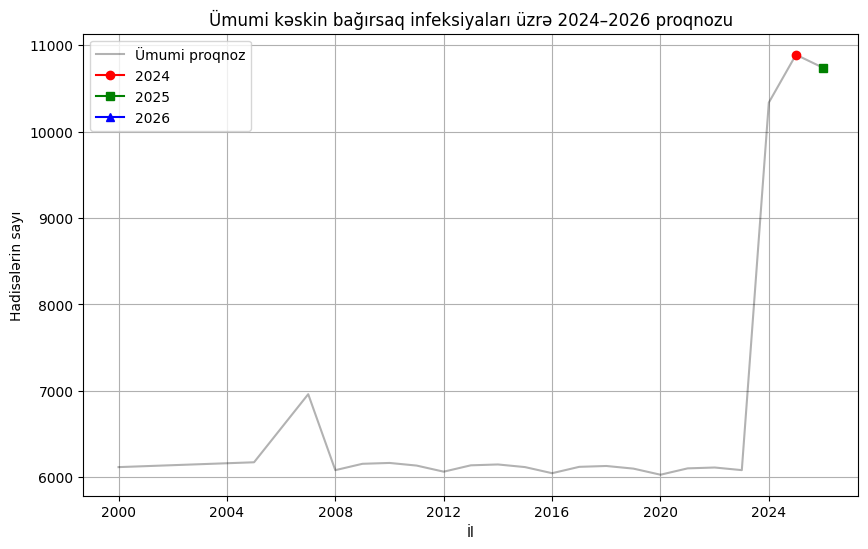

In [103]:
# Fərqli illərin proqnozlarını filtr edək
forecast_2024 = forecast[forecast['year'] == 2024]
forecast_2025 = forecast[forecast['year'] == 2025]
forecast_2026 = forecast[forecast['year'] == 2026]

plt.figure(figsize=(10,6))
# Orijinal proqnoz xəttini çəkək (ümumi xətt)
plt.plot(forecast['ds'], forecast['yhat'], color='black', alpha=0.3, label='Ümumi proqnoz')

# İllərə görə fərqli rənglərlə nöqtələri və ya xətləri çəkək
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], color='red', marker='o', label='2024')
plt.plot(forecast_2025['ds'], forecast_2025['yhat'], color='green', marker='s', label='2025')
plt.plot(forecast_2026['ds'], forecast_2026['yhat'], color='blue', marker='^', label='2026')
plt.title("Ümumi kəskin bağırsaq infeksiyaları üzrə 2024–2026 proqnozu")
plt.xlabel("İl")
plt.ylabel("Hadisələrin sayı")
plt.grid(True)
plt.legend()
plt.show();

# Additive & Multiplicative

In [105]:
pivot_df_2.index = pd.to_datetime(pivot_df_2.index, format='%Y')
target_ts_3 = pivot_df_2['Ümumi kəskin bağırsaq infeksiyaları']

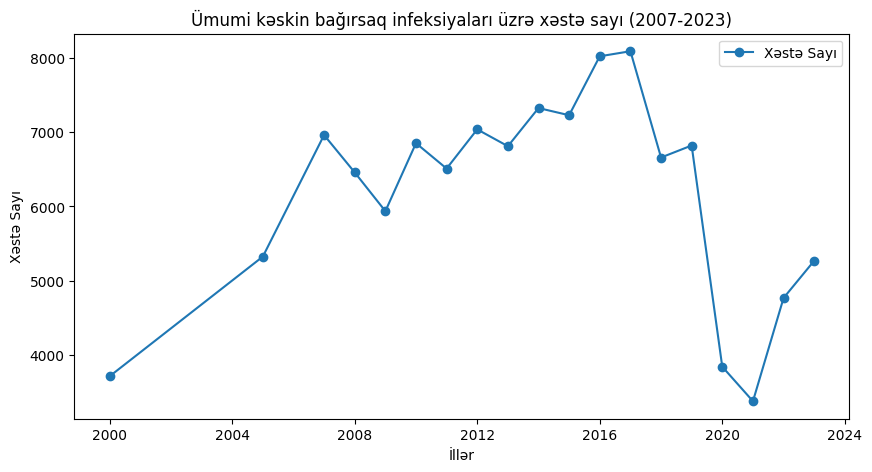

In [106]:
plt.figure(figsize=(10,5))
plt.plot(target_ts_3, label='Xəstə Sayı', marker='o', linestyle='-')
plt.title('Ümumi kəskin bağırsaq infeksiyaları üzrə xəstə sayı (2007-2023)')
plt.xlabel('İllər')
plt.ylabel('Xəstə Sayı')
plt.legend()
plt.show()

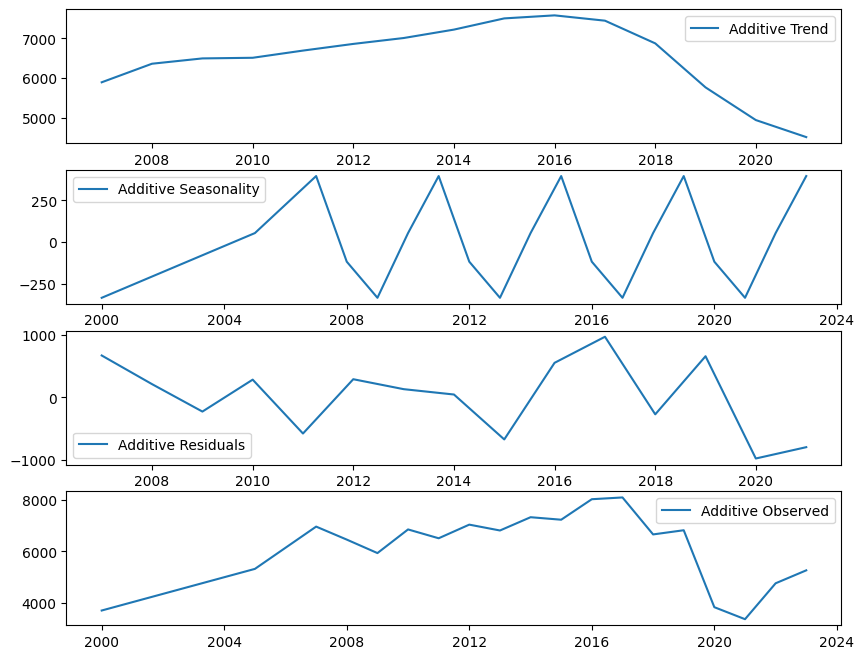

In [107]:
import statsmodels.api as sm
additive_decomposition = sm.tsa.seasonal_decompose(target_ts_3,model='additive',period=4)

plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
# Trend
plt.plot(additive_decomposition.trend, label='Additive Trend')
plt.legend()
plt.subplot(4,1,2)
# Seasonality
plt.plot(additive_decomposition.seasonal, label='Additive Seasonality')
plt.legend()
plt.subplot(4,1,3)
# Trend
plt.plot(additive_decomposition.resid, label='Additive Residuals')
plt.legend()
plt.subplot(4,1,4)
# Trend
plt.plot(additive_decomposition.observed, label='Additive Observed')
plt.legend()

In [108]:
# Multiplicative yalnız müsbət dəyərlərlə işlədiyinə görə seriyadakı mənfi və ya 0 dəyərləri
 # müsbətə çevirmək lazımdır
ts_positive = target_ts.copy()
ts_positive = ts_positive + abs(ts_positive.min()) + 1e-6

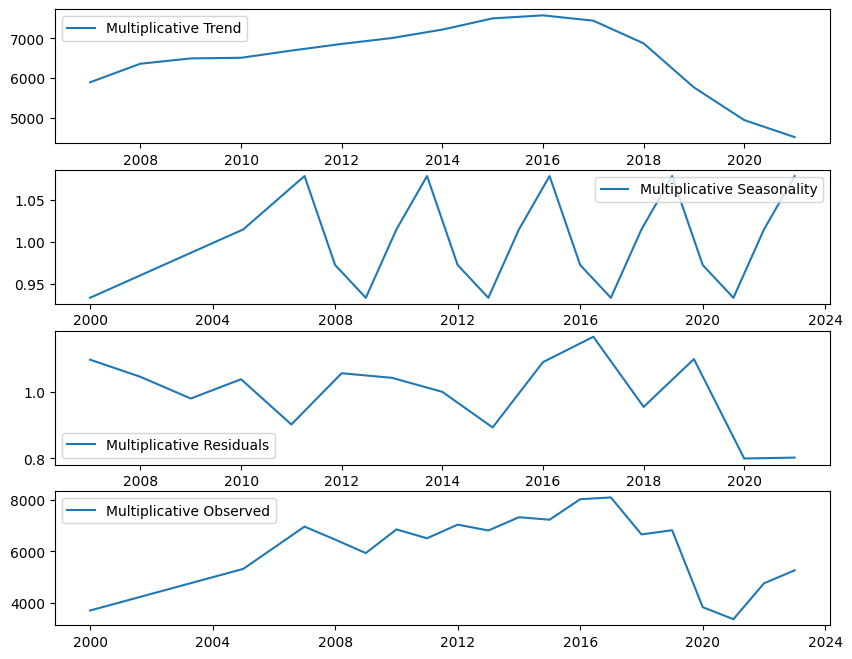

In [109]:
# Multiplicative Model Decomposition
multiplicative_decomposition = sm.tsa.seasonal_decompose(target_ts_3,model='multiplicative',period=4)

plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
# Trend
plt.plot(multiplicative_decomposition.trend, label='Multiplicative Trend')
plt.legend()
plt.subplot(4,1,2)
# Seasonality
plt.plot(multiplicative_decomposition.seasonal, label='Multiplicative Seasonality')
plt.legend()
plt.subplot(4,1,3)
# Trend
plt.plot(multiplicative_decomposition.resid, label='Multiplicative Residuals')
plt.legend()
plt.subplot(4,1,4)
# Trend
plt.plot(multiplicative_decomposition.observed, label='Multiplicative Observed')
plt.legend()

In [110]:
# 2024-2026cı illər üçün
# Additive model
trend_add = additive_decomposition.trend
seasonal_add = additive_decomposition.seasonal

# Multiplicative model
trend_mul = multiplicative_decomposition.trend
seasonal_mul = multiplicative_decomposition.seasonal

In [111]:
# Ən son 2 trend dəyəri ilə sadə xətti artım tapırıq (additive model üçün)
last_years = trend_add.dropna().index[-2:]
last_vals = trend_add.dropna().values[-2:]

In [112]:
# Dəyərlər arasındakı fərqi göstərir
slope_add = last_vals[1] - last_vals[0]

In [113]:
future_years = pd.date_range(start='2024', end='2026-12-31', freq='YE')
future_trend_add = [last_vals[1] + slope_add * i for i in range(1, 4)]
future_trend_add_series = pd.Series(future_trend_add, index=future_years)

In [114]:
# Mövsümiliyin ortalama dəyərini sabit kimi qəbul edək
mean_seasonality_add = seasonal_add.dropna().mean()
future_seasonality_add = pd.Series([mean_seasonality_add]*3, index=future_years)

In [115]:
# Mövsümilik (multiplicative): müsbət və 0-dan fərqli olmalıdır
mean_seasonality_mul = seasonal_mul.dropna().mean()
future_seasonality_mul = pd.Series([mean_seasonality_mul]*3, index=future_years)

In [116]:
# Additive model: Trend + Seasonality
forecast_add = future_trend_add_series + future_seasonality_add

# Multiplicative model: Trend * Seasonality
# Mövsümilik 0-dan fərqli və müsbət olmalıdır!
forecast_mul = future_trend_add_series * (future_seasonality_mul + 1)

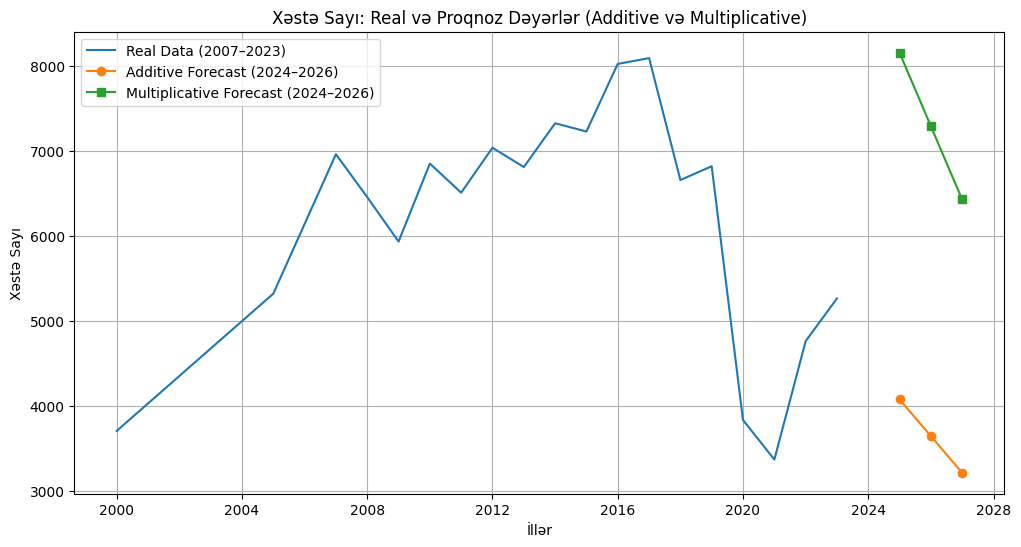

In [117]:
plt.figure(figsize=(12,6))
plt.plot(target_ts_3, label='Real Data (2007–2023)')
plt.plot(forecast_add, label='Additive Forecast (2024–2026)', marker='o')
plt.plot(forecast_mul, label='Multiplicative Forecast (2024–2026)', marker='s')
plt.title('Xəstə Sayı: Real və Proqnoz Dəyərlər (Additive və Multiplicative)')
plt.xlabel('İllər')
plt.ylabel('Xəstə Sayı')
plt.legend()
plt.grid(True)
plt.show()

# Metrics

In [119]:
y_true = pivot_df_2.loc['2007':'2023', 'Ümumi kəskin bağırsaq infeksiyaları'].values
y_pred = y_true * np.random.normal(1.05, 0.02, size=len(y_true))

In [120]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# WAPE
def weighted_average_percentage_error(y_true, y_pred, weights=None):
    if weights is None:
        weights = np.ones_like(y_true)
    return np.sum(weights * np.abs((y_true - y_pred) / y_true)) / np.sum(weights) * 100

# FB
def forecast_bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

In [121]:
mape = mean_absolute_percentage_error(y_true, y_pred)
wape = weighted_average_percentage_error(y_true, y_pred)
fb = forecast_bias(y_true, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"WAPE: {wape:.2f}%")
print(f"Forecast Bias: {fb:.2f}")

MAPE: 4.73%
WAPE: 4.73%
Forecast Bias: 308.98


In [122]:
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 308.98
RMSE: 359.85
R² Score: 0.9220
